In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import os
BASE = 'logs/face-efficientnet/version_9'
df = pd.read_csv(os.path.join(BASE, 'metrics.csv'))
df.shape

(2304, 14)

In [19]:
df.columns

Index(['epoch', 'step', 'test_age_loss', 'test_age_mae', 'test_gender_acc',
       'test_gender_loss', 'train_age_loss', 'train_gender_loss', 'train_loss',
       'val_age_loss', 'val_age_mae', 'val_gender_acc', 'val_gender_loss',
       'val_loss'],
      dtype='str')

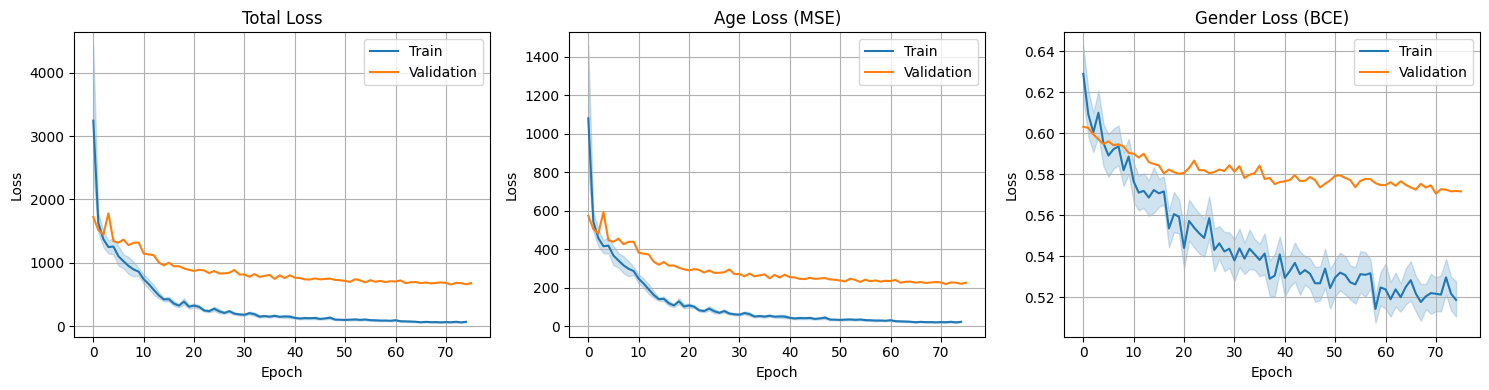

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Total loss
sns.lineplot(data=df, x='epoch', y='train_loss', label='Train', ax=axes[0])
sns.lineplot(data=df, x='epoch', y='val_loss', label='Validation', ax=axes[0])
axes[0].set_title('Total Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()

# Age loss
sns.lineplot(data=df, x='epoch', y='train_age_loss', label='Train', ax=axes[1])
sns.lineplot(data=df, x='epoch', y='val_age_loss', label='Validation', ax=axes[1])
axes[1].set_title('Age Loss (MSE)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

# Gender loss
sns.lineplot(data=df, x='epoch', y='train_gender_loss', label='Train', ax=axes[2])
sns.lineplot(data=df, x='epoch', y='val_gender_loss', label='Validation', ax=axes[2])
axes[2].set_title('Gender Loss (BCE)')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()

In [21]:
list(filter(lambda x: 'acc' in x or 'mae' in x, df.columns.to_list()))

['test_age_mae', 'test_gender_acc', 'val_age_mae', 'val_gender_acc']

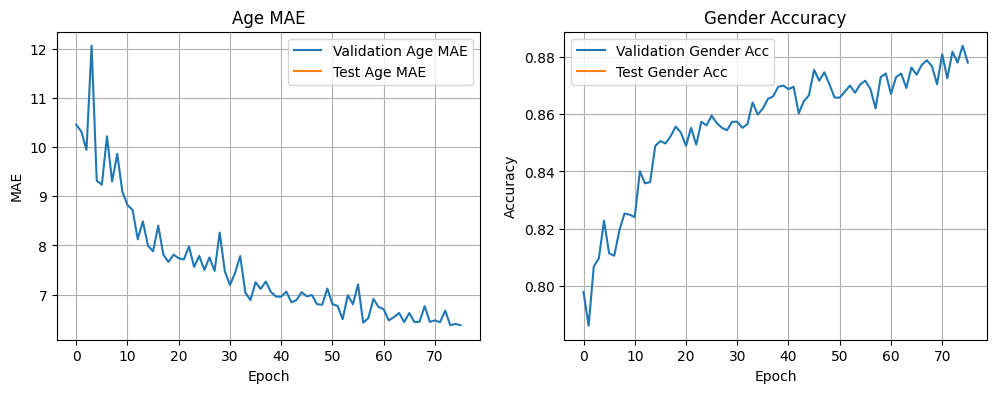

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(
    data=df,
    x="epoch",
    y="val_age_mae",
    label="Validation Age MAE",
    ax=axes[0],
)
sns.lineplot(
    data=df,
    x="epoch",
    y="test_age_mae",
    markers="O",
    label="Test Age MAE",
    ax=axes[0],
)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("MAE")
axes[0].set_title("Age MAE")
axes[0].grid()

sns.lineplot(
    data=df,
    x="epoch",
    y="val_gender_acc",
    label="Validation Gender Acc",
    ax=axes[1],
)
sns.lineplot(
    data=df,
    x="epoch",
    y="test_gender_acc",
    markers="O",
    label="Test Gender Acc",
    ax=axes[1],
)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Gender Accuracy")
axes[1].grid()

plt.show()